### WeatherPy by Eric Roberts

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [69]:
def weatherurl(cityname,country):
    #api.openweathermap.org/data/2.5/weather?q={city name},{country code}

    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    base_url += cityname
    base_url += ","
    base_url += country
    base_url += "&appid="
    base_url += api_key
    return base_url


def convert_from_k_to_f(k):
    #T(°F) = T(K) × 9/5 - 459.67
    f = (k * (9/5)) - 459.67
    return f

def mps_to_mph(mps):
    return 2.23694 * mps

cityprogress = 0
loc = 0
with open(output_data_file, 'w', newline='') as csvfile:
    w = csv.writer(csvfile, delimiter=',')
    
    headers = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp (F)', 'Wind Speed']
    w.writerow(headers)
    df = pd.DataFrame(columns=headers)

    #cities[:50]
    for city in cities:
        url = weatherurl(city.city_name,city.country_code)
        response = requests.get(url)
        r = response.json()
        cityprogress +=1
        progress_string = "Retrieving City "+str(cityprogress)+" of "+str(len(cities))+" | "+city.city_name
        if (r['cod'] == 200):
            #retrieve these features:
            #City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
            row = [r['name'],r['clouds']['all'],r['sys']['country'],r['dt'],r['main']['humidity'],r['coord']['lat'],r['coord']['lon'],convert_from_k_to_f(r['main']['temp_max']),mps_to_mph(r['wind']['speed'])]
            w.writerow(row)
            df.loc[loc] = row
            loc+=1
        else:
            progress_string+=" << 404, Not Found >>"
        print (progress_string)

            
    print ("Writing Complete")


Retrieving City 1 of 617 | new norfolk
Retrieving City 2 of 617 | umzimvubu << 404, Not Found >>
Retrieving City 3 of 617 | manggar
Retrieving City 4 of 617 | bluff
Retrieving City 5 of 617 | kabale
Retrieving City 6 of 617 | bambous virieux
Retrieving City 7 of 617 | ushuaia
Retrieving City 8 of 617 | mahebourg
Retrieving City 9 of 617 | kahului
Retrieving City 10 of 617 | kapaa
Retrieving City 11 of 617 | yellowknife
Retrieving City 12 of 617 | kavaratti
Retrieving City 13 of 617 | samalaeulu << 404, Not Found >>
Retrieving City 14 of 617 | illoqqortoormiut << 404, Not Found >>
Retrieving City 15 of 617 | hilo
Retrieving City 16 of 617 | torbay
Retrieving City 17 of 617 | quatre cocos
Retrieving City 18 of 617 | mataura << 404, Not Found >>
Retrieving City 19 of 617 | cidreira
Retrieving City 20 of 617 | taolanaro << 404, Not Found >>
Retrieving City 21 of 617 | busselton
Retrieving City 22 of 617 | albert
Retrieving City 23 of 617 | leopold
Retrieving City 24 of 617 | port alfred
Re

Retrieving City 206 of 617 | kattivakkam
Retrieving City 207 of 617 | leningradskiy
Retrieving City 208 of 617 | ust-omchug
Retrieving City 209 of 617 | hofn
Retrieving City 210 of 617 | elizabeth city
Retrieving City 211 of 617 | ahuimanu
Retrieving City 212 of 617 | kapoeta << 404, Not Found >>
Retrieving City 213 of 617 | nguiu << 404, Not Found >>
Retrieving City 214 of 617 | cabo san lucas
Retrieving City 215 of 617 | amalapuram
Retrieving City 216 of 617 | caravelas
Retrieving City 217 of 617 | eureka
Retrieving City 218 of 617 | brae
Retrieving City 219 of 617 | malinovskiy
Retrieving City 220 of 617 | aswan
Retrieving City 221 of 617 | san cristobal
Retrieving City 222 of 617 | ismailia
Retrieving City 223 of 617 | lata << 404, Not Found >>
Retrieving City 224 of 617 | yarmouth
Retrieving City 225 of 617 | port hedland
Retrieving City 226 of 617 | katherine
Retrieving City 227 of 617 | muzhi
Retrieving City 228 of 617 | elat << 404, Not Found >>
Retrieving City 229 of 617 | hib

Retrieving City 403 of 617 | santa isabel
Retrieving City 404 of 617 | geraldton
Retrieving City 405 of 617 | lagunas
Retrieving City 406 of 617 | bad hofgastein
Retrieving City 407 of 617 | kirakira
Retrieving City 408 of 617 | shelburne
Retrieving City 409 of 617 | kuryk
Retrieving City 410 of 617 | geraldton
Retrieving City 411 of 617 | cheney
Retrieving City 412 of 617 | willmar
Retrieving City 413 of 617 | balakhta
Retrieving City 414 of 617 | sajanan
Retrieving City 415 of 617 | grindavik
Retrieving City 416 of 617 | ilebo
Retrieving City 417 of 617 | mozarlandia
Retrieving City 418 of 617 | luderitz
Retrieving City 419 of 617 | yar-sale
Retrieving City 420 of 617 | doka
Retrieving City 421 of 617 | matamoros
Retrieving City 422 of 617 | nicoya
Retrieving City 423 of 617 | koumac
Retrieving City 424 of 617 | kandi
Retrieving City 425 of 617 | svetlaya
Retrieving City 426 of 617 | marsh harbour
Retrieving City 427 of 617 | college
Retrieving City 428 of 617 | nevinnomyssk
Retrievi

Retrieving City 605 of 617 | padang
Retrieving City 606 of 617 | guadalajara
Retrieving City 607 of 617 | alenquer
Retrieving City 608 of 617 | nam tha << 404, Not Found >>
Retrieving City 609 of 617 | aksarka
Retrieving City 610 of 617 | keflavik
Retrieving City 611 of 617 | beatrice
Retrieving City 612 of 617 | urman
Retrieving City 613 of 617 | kidero
Retrieving City 614 of 617 | todos santos
Retrieving City 615 of 617 | puerto escondido
Retrieving City 616 of 617 | kidal
Retrieving City 617 of 617 | san juan
Writing Complete


In [60]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,New Norfolk,100,AU,1567785351,95,-42.78,147.06,46.004,1.006623
1,Manggar,10,ID,1567785352,89,-2.88,108.27,75.110,4.406772
2,Bluff,20,NZ,1567785308,67,-46.60,168.33,45.950,6.889775
3,Kabale,100,UG,1567785352,72,-1.26,29.99,60.530,1.901399
4,Bambous Virieux,75,MU,1567785352,78,-20.34,57.76,73.400,3.355410


In [75]:
def find_the_date():
    ts = int(min(list(df['Date'])))
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d')

the_date = find_the_date()

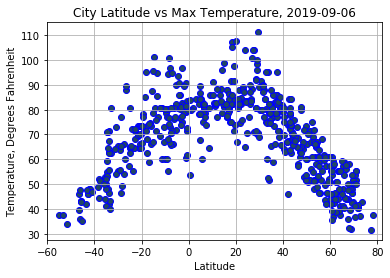

In [77]:
lat_p = list(df['Lat'])
temp_p = list(df['Max Temp (F)'])
plt.xlim(-60, 82)
plt.grid(True)

plt.scatter(lat_p, temp_p, marker="o", facecolors="#204763", edgecolors="blue")
plt.title("City Latitude vs Max Temperature, "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Temperature, Degrees Fahrenheit")

plt.savefig("./Images/lat_vs_temp.png")

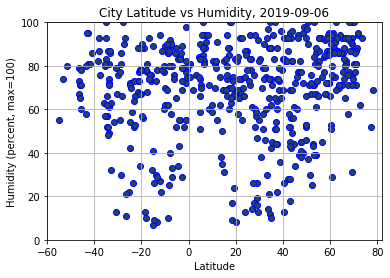

In [78]:
plt.xlim(-60, 82)
plt.ylim(0, 100)

plt.grid(True)

plt.scatter(lat_p, list(df['Humidity']), marker="o", facecolors="#204763", edgecolors="blue")
plt.title("City Latitude vs Humidity, "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (percent, max=100)")

plt.savefig("./Images/lat_vs_hum.png")

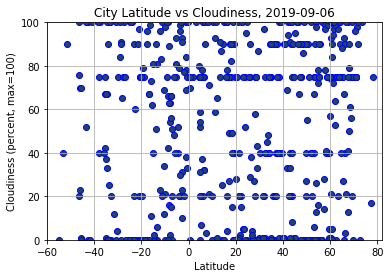

In [79]:
plt.xlim(-60, 82)
plt.ylim(0, 100)

plt.grid(True)

plt.scatter(lat_p, list(df['Cloudiness']), marker="o", facecolors="#204763", edgecolors="blue")
plt.title("City Latitude vs Cloudiness, "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (percent, max=100)")

plt.savefig("./Images/lat_vs_clod.png")

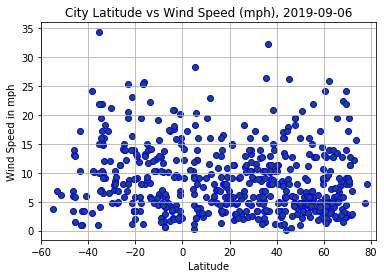

In [80]:
plt.xlim(-60, 82)

plt.grid(True)

plt.scatter(lat_p, list(df['Wind Speed']), marker="o", facecolors="#204763", edgecolors="blue")
plt.title("City Latitude vs Wind Speed (mph), "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")

plt.savefig("./Images/lat_vs_wind.png")